# Network Cases

In [54]:
#!pip install networkx

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
test = pd.read_csv('judgements_full.csv')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 238925, saw 3


In [2]:
# Using an small graph
g = nx.read_edgelist('orders_general_filter.txt',create_using=nx.DiGraph())

In [3]:
nodes, edges = g.order(), g.size()

In [4]:
avg_deg = float(nodes)/edges

In [5]:
print ('Nodes: {}\nEdges: {}\nAvg Degree: {}'.format(nodes, edges, avg_deg) )

Nodes: 373
Edges: 456
Avg Degree: 0.8179824561403509


## Centrality Measures

In [29]:
def centrality_table(centrality_output):
    table = pd.DataFrame([i for i in centrality_output.items()]).sort_values(by=1, ascending=False)
    table.columns = ['Node','Centrality']
    return table

**Degree centrality**  
For particular node is the fraction of nodes it is connected to.

In [37]:
degree = nx.degree_centrality(g)
df_degree = centrality_table(degree)
df_degree.head(10)

,Node,Centrality
352,62014TO0721,0.088710
184,61997TO0109,0.067204
69,62002TO0231,0.059140
101,62007TO0137,0.056452
93,62011TO0112,0.048387
237,62014TO0578,0.048387
206,62013TO0337,0.048387
308,62002TO0381,0.045699
263,61999TO0268,0.043011
46,62015TO0474,0.040323


**Closeness centrality**   

Notice that higher values of closeness indicate higher centrality.

In [38]:
closeness = nx.closeness_centrality(g)
df_closeness = centrality_table(closeness)
df_closeness.head(10)

,Node,Centrality
265,61989CJ0309,0.021774
15,61995CO0010,0.015640
230,61996TO0122,0.014516
82,62010CJ0618,0.013825
119,62008CJ0540,0.013825
300,61968CJ0006,0.013234
66,61995CO0087,0.013172
330,61990CJ0313,0.013172
30,61962CJ0025,0.012289
333,61993TJ0482,0.011470


**Communicability**   
How good the nodes can reach others

In [40]:
#not for diricted graph
#communicability = nx.communicability(g)
#df_communicability = centrality_summary(communicability)
#df_communicability.head(10)

**Betweenness centrality**   
It helps to detect influential nodes  

In [22]:
betweenness = nx.betweenness_centrality(g)

In [23]:
centrality_summary(betweenness)

,0
count,373.000000
mean,0.002267
std,0.008012
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000026
max,0.069428


In [31]:
tradeoff = 0.002

In [32]:
highbetw = {key if value > tradeoff else None for key, value in betweenness.items()}
normbetw = {key if value <= tradeoff else None for key, value in betweenness.items()}

In [37]:
subgraphs = [highbetw,normbetw]
colors = ["lightgreen", "skyblue"] #more.. "skyblue", "mistyrose", "aliceblue"]

In [38]:
def find_color(node):
    for subgraph in subgraphs:
        if node in subgraph:
            return colors[subgraphs.index(subgraph)]
    return "ghostwhite"

In [39]:
node_colors = [find_color(node) for node in g.nodes()]

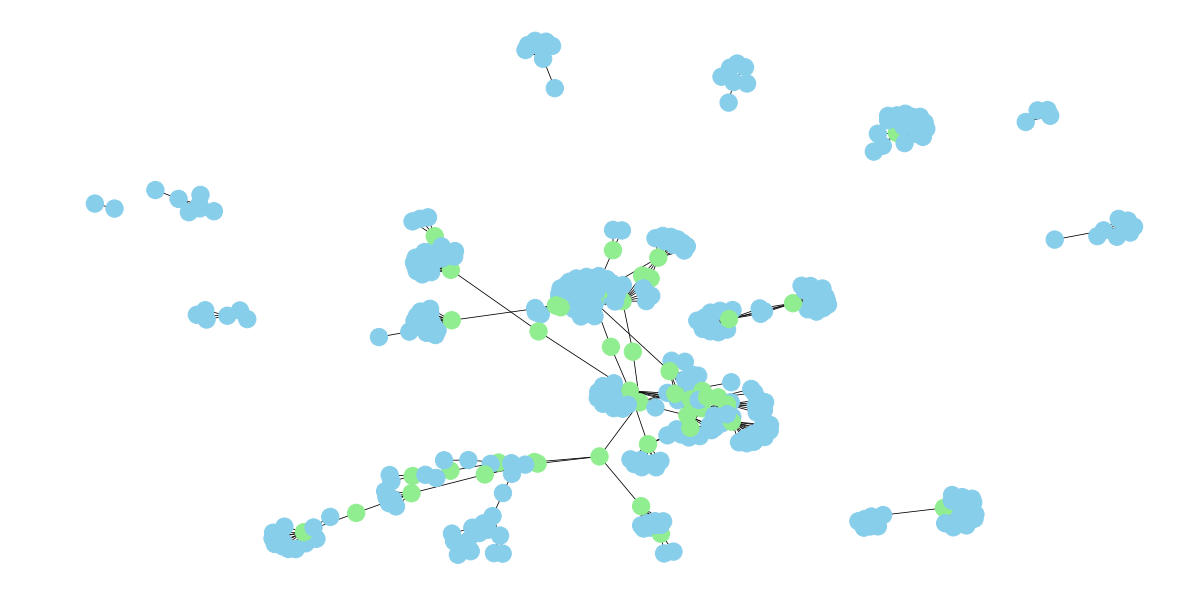

In [42]:
plt.figure(figsize=(16, 8))
nx.draw(g, node_color=node_colors, width=0.8)

In [43]:
pagerank = nx.pagerank(g, alpha=0.9)

In [45]:
# Create function to retrieve nodes and its degrees
def degree_table(degree_vector):
    d_table = pd.DataFrame()
    nodes, degrees = [], []
    for node, degree in degree_vector:
        nodes.append(node)
        degrees.append(degree)
    
    d_table['nodes'] = nodes
    d_table['degrees'] = degrees
    return d_table

#### Degree Frequency

In [46]:
degrees = degree_table(g.degree()) #also in_degree(), g.out_degree()
plot_degrees = degrees.groupby('degrees').count().head(10)

Text(0,0.5,'Number of nodes')

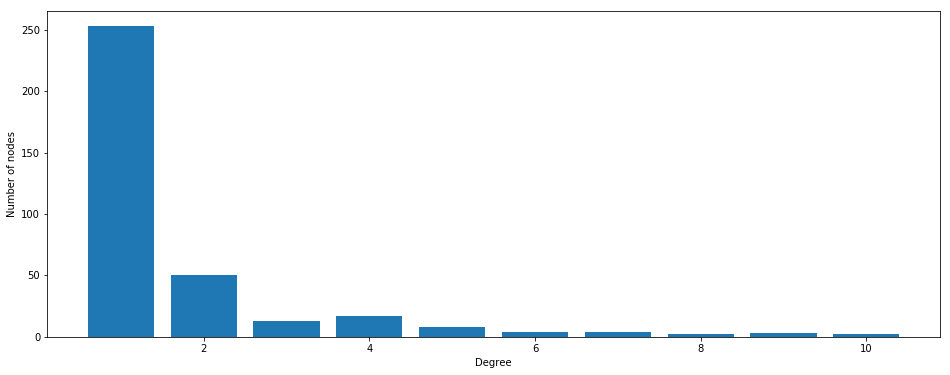

In [49]:
plt.figure(figsize=(16, 6))
plt.bar(plot_degrees.index, plot_degrees['nodes']) # degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

**Eccentricity**   
Of a node v is the maximum distance from v to all other nodes in G.

The **diameter** is the maximum eccentricity.

In [51]:
#nx.diameter(g)

The **radius** is the minimum eccentricity.

In [53]:
#nx.radius(g)

The **center** is the set of nodes with eccentricity equal to radius.

In [ ]:
#nx.center(g)

The **dijkstra** method to find the shortest path between two nodes 

In [ ]:
#dijkstra = nx.dijkstra_path(g,#'node','node')